In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta

sns.set(rc = {'figure.figsize':(15,10)})
#read csv + info
hour_drive = pd.read_csv('hour_drive.csv')
hour_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      52011 non-null  int64  
 1   timestamp (ms)  52011 non-null  int64  
 2   acc_x           52011 non-null  int64  
 3   acc_y           52011 non-null  int64  
 4   acc_z           52011 non-null  int64  
 5   gyro_x          52011 non-null  float64
 6   gyro_y          52011 non-null  float64
 7   gyro_z          52011 non-null  float64
 8   Speed(Km/h)     52011 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.6 MB


In [91]:
#drop column
hour_drive = hour_drive.drop(columns = ['Unnamed: 0'])

In [92]:
#convert ms into s in new column
hour_drive['seconds'] = hour_drive['timestamp (ms)'] * 0.001
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567
...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523


In [93]:
#create a clock from the s column
start_time = pd.to_datetime('30/3/2022 18:10:00')
new_datetime = start_time + pd.to_timedelta(hour_drive['seconds'], unit = 's')
hour_drive['Clock'] = new_datetime
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,2022-03-30 18:43:39.518
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,2022-03-30 18:43:39.530
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,2022-03-30 18:43:39.542
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,2022-03-30 18:43:39.555
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,2022-03-30 18:43:39.567
...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,2022-03-30 19:17:18.485
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,2022-03-30 19:17:18.498
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,2022-03-30 19:17:18.510
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,2022-03-30 19:17:18.523


In [94]:
hour_drive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52011 entries, 0 to 52010
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp (ms)  52011 non-null  int64         
 1   acc_x           52011 non-null  int64         
 2   acc_y           52011 non-null  int64         
 3   acc_z           52011 non-null  int64         
 4   gyro_x          52011 non-null  float64       
 5   gyro_y          52011 non-null  float64       
 6   gyro_z          52011 non-null  float64       
 7   Speed(Km/h)     52011 non-null  float64       
 8   seconds         52011 non-null  float64       
 9   Clock           52011 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 4.0 MB


In [95]:
#get rid of date
hour_drive['Clock'] = new_datetime.dt.strftime('%H:%M:%S:%f')

In [96]:
hour_drive.head(100)

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000
...,...,...,...,...,...,...,...,...,...,...
95,2020699,-128,160,-256,2.019,0.155,3.584,0.0,2020.699,18:43:40:699000
96,2020712,160,160,-32,2.019,0.155,3.584,0.0,2020.712,18:43:40:712000
97,2020724,160,224,96,2.019,0.155,3.584,0.0,2020.724,18:43:40:724000
98,2020736,-96,32,-160,2.019,0.155,3.584,0.0,2020.736,18:43:40:736000


In [97]:
#filter with rolling average 50 ---> looked more consistent with filtered data provided by zoomo // we could change
hour_drive['SMA50AX'] = hour_drive['acc_x'].rolling(50).mean()
hour_drive['SMA50AY'] = hour_drive['acc_y'].rolling(50).mean()
hour_drive['SMA50AZ'] = hour_drive['acc_z'].rolling(50).mean()
hour_drive['SMA50GX'] = hour_drive['gyro_x'].rolling(50).mean()
hour_drive['SMA50GY'] = hour_drive['gyro_y'].rolling(50).mean()
hour_drive['SMA50GZ'] = hour_drive['gyro_z'].rolling(50).mean()

In [98]:
#look at min of all columns
print(hour_drive['SMA50AX'].min())
print(hour_drive['SMA50AY'].min())
print(hour_drive['SMA50AZ'].min())
print(hour_drive['SMA50GX'].min())
print(hour_drive['SMA50GY'].min()) 
print(hour_drive['SMA50GZ'].min()) 

-1551.36
-851.2
-1977.6
-43.817001
-7.402
-80.455002


In [99]:
#look at max for all columns
print(hour_drive['SMA50AX'].max())
print(hour_drive['SMA50AY'].max())
print(hour_drive['SMA50AZ'].max())
print(hour_drive['SMA50GX'].max())
print(hour_drive['SMA50GY'].max()) 
print(hour_drive['SMA50GZ'].max()) 

1999.36
876.8
1639.68
15.391000000000002
9.203
37.088001


In [100]:

#calculate amag
hour_drive['AMAG'] = (hour_drive['SMA50AX']**2 + hour_drive['SMA50AY']**2 + hour_drive['SMA50AZ']**2)**0.5
hour_drive['AMAG']


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
52006    890.511418
52007    800.669927
52008    684.971642
52009    595.388873
52010    572.436980
Name: AMAG, Length: 52011, dtype: float64

In [101]:
print(hour_drive['AMAG'].max())

2283.053764062511


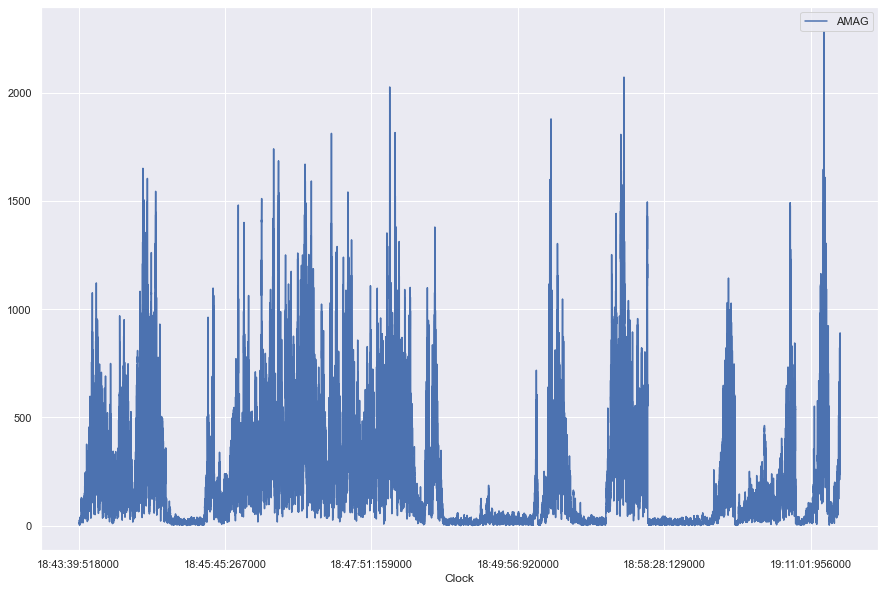

In [102]:
#plot AMAG
hour_drive.plot(x = 'Clock', y = 'AMAG')
plt.show()

In [103]:
#calculate std
hour_drive['std'] = hour_drive['AMAG'].std()
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,SMA50GX,SMA50GY,SMA50GZ,AMAG,std
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,-0.095,-0.015,0.061,890.511418,264.78128
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,-0.095,-0.015,0.061,800.669927,264.78128
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,-0.095,-0.015,0.061,684.971642,264.78128
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,-0.095,-0.015,0.061,595.388873,264.78128


In [104]:
#calculated 2std and 3 std
hour_drive['2std'] = hour_drive['AMAG'].std()*2
hour_drive
hour_drive['3std'] = hour_drive['AMAG'].std()*3
hour_drive

,timestamp (ms),acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,Speed(Km/h),seconds,Clock,SMA50AX,SMA50AY,SMA50AZ,SMA50GX,SMA50GY,SMA50GZ,AMAG,std,2std,3std
0,2019518,0,-64,-64,2.019,0.155,3.584,0.0,2019.518,18:43:39:518000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
1,2019530,-64,64,96,2.019,0.155,3.584,0.0,2019.530,18:43:39:530000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
2,2019542,256,32,-224,2.019,0.155,3.584,0.0,2019.542,18:43:39:542000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
3,2019555,-64,0,320,2.019,0.155,3.584,0.0,2019.555,18:43:39:555000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
4,2019567,64,128,0,2.019,0.155,3.584,0.0,2019.567,18:43:39:567000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.78128,529.562561,794.343841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52006,4038485,-13216,-2176,416,-0.095,-0.015,0.061,13.6,4038.485,19:17:18:485000,-870.40,3.20,-188.16,-0.095,-0.015,0.061,890.511418,264.78128,529.562561,794.343841
52007,4038498,5408,-352,-10624,-0.095,-0.015,0.061,13.6,4038.498,19:17:18:498000,-734.08,32.00,-318.08,-0.095,-0.015,0.061,800.669927,264.78128,529.562561,794.343841
52008,4038510,5568,-480,-2912,-0.095,-0.015,0.061,13.6,4038.510,19:17:18:510000,-658.56,23.68,-186.88,-0.095,-0.015,0.061,684.971642,264.78128,529.562561,794.343841
52009,4038523,2368,1216,7168,-0.095,-0.015,0.061,13.6,4038.523,19:17:18:523000,-582.40,83.20,-91.52,-0.095,-0.015,0.061,595.388873,264.78128,529.562561,794.343841


In [105]:
score = 0

In [106]:
def Rough_rider_score(self):
    score=0
    if ((hour_drive['AMAG'] > 794.343841) and (hour_drive['AMAG']>529.562561) and (hour_drive['AMAG']>264.78128)== True):
        score += 3
        if ((hour_drive['AMAG']>529.562561) and (hour_drive['AMAG']>264.78128) ==True):
            score+=2
            if ((hour_drive['AMAG']>264.78128)== True):
                score += 1
                if ((hour_drive['AMAG']>264.78128) ==False):
                    score +=0
            print(score)
            return
print(score)


0


In [107]:
hour_AMAG=hour_drive['AMAG']
hour_AMAG


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
52006    890.511418
52007    800.669927
52008    684.971642
52009    595.388873
52010    572.436980
Name: AMAG, Length: 52011, dtype: float64

In [108]:
def Rough_rider_score():
    score=0
    if ((hour_AMAG > 794.343841) & (hour_AMAG>529.562561) & (hour_AMAG>264.78128)):
        score += 3
        if ((hour_AMAG>529.562561) & (hour_AMAG>264.78128)):
            score+=2
            if ((hour_AMAG>264.78128)):
                score += 1
                if ((hour_AMAG<264.78128) ):
                    score +=0
            print(score)
            return

In [109]:
def function(self):
    if df >= 700 :
        return "A"
    elif df >= 500:
        return "B"
    elif df >= 300:
        return "C"
    else:
        return "D"
    

In [110]:
df['score']=df.apply(function)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [111]:
df = pd.DataFrame(np.random.randint(0,1000,size=(1000)))
df.head(20)

,0
0,57
1,86
2,964
3,190
4,580
5,145
6,377
7,706
8,208
9,645


In [112]:
def generic_function_name(self):
    score=0
    if ((df> 700))  :
        score += 3
        if ((df>500)):
            score+=2
            if ((df>300)):
                score += 1
                if ((df<300)):
                    score +=0
            print(score)
            return

In [113]:
df['score']=df.apply(generic_function_name, axis=1, raw=True)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [114]:
gradeMap = {
"A" : (95, 100),
"B" : (80, 94),
"C" : (70, 90),
"D" : (60, 69),
"E" : (0, 59)
}

In [115]:
def score_to_grade(score, gradeMap):
    for (g, (min_score, max_score)) in gm.items():
        if (score >= min_score and score < max_score):
            return g

In [116]:
def score_to_grade(score, gm):
    for (g, (min_score, max_score)) in gradeMap.items():
        if (score >= min_score and score < max_score):
            return g

In [117]:
students = ["jimmy", "carolin", "frank", "joseph"]

scores = ["100", "90", "70", "65"]

In [118]:
score_to_grade(scores, gradeMap)

TypeError: '>=' not supported between instances of 'list' and 'int'

In [119]:
def get_grade(score):
    scores = [('A', 95, 100), ('B', 80, 94), ('C', 70, 79), ('D', 60, 69), ('E', 0, 59)]
    result = [grade for grade, low, high in scores if score >= low and score <= high]
    return result[0] if result else 'Invalid Score'


students = ["jimmy", "carolin", "frank", "joseph"]
scores = ["100", "90", "70", "65"]
grades = [get_grade(int(i)) for i in scores]

results = list(zip(students, scores, grades))

for name, score, result in results:
    print(name, score, result)

jimmy 100 A
carolin 90 B
frank 70 C
joseph 65 D


In [120]:
def get_grade(scores):
    scores = [('A', 701, 1000), ('B', 501, 700), ('C', 301, 500), ('D', 100, 300), ('E', 0, 99)]
    result = [grade for grade, low, high in scores if score >= low and score <= high]
    return result[0] if result else 'Invalid Score'
scores = pd.DataFrame(np.random.randint(0,1000,size=(1000)))
grades = [get_grade(int(i))for i in scores]

results = list(zip(scores, grades))

for score, result in results:
    print(score, result)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [121]:
df.agg(['generic_function_name'])

AttributeError: 'generic_function_name' is not a valid function for 'Series' object

In [122]:
df1 = df[(df >= 700) & (df < 1000)]
df1
df2=df[(df<700)& (df>=500)]
df3=df[(df<500)& (df>300)]
df4=df[(df<300)]

In [123]:
df1.value_counts().sum()

291

In [124]:
df2.value_counts().sum()

205

In [125]:
df3.value_counts().sum()

181

In [126]:
df4.value_counts().sum()

322

In [127]:
def new_function(self):
    score=0
    if df.gt(700):
        score += 3
        if df.gt(500):
            score += 2
            if df.gt(300):
                score +=1
                if df.lt(300):
                    score+=0
                
                print(score)
                return

In [128]:
new_function(df)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [129]:
df.iloc[df>700]

IndexError: DataFrame indexer is not allowed for .iloc
Consider using .loc for automatic alignment.

In [130]:
#this is the working function i've made, may need a little bit of sprucing up to get it to work on the dataframes without
#too much work on the part of zoomo, as in they can just plug the dataframe into the function
def Rough_function(df):
    df1 = df[(df['AMAG'] >= 1185.776964)]
    df2= df[(df['AMAG']<1185.776964)& (df['AMAG']>=790.517976)]
    df3= df[(df['AMAG']<790.517976)& (df['AMAG']>=395.258988)]
    a=df1.value_counts().sum()
    b=df2.value_counts().sum()
    c=df3.value_counts().sum()
    score=(a*3)+(b*2)+c
    print(score)

In [151]:
Rough_function(hour_drive)

13728


In [132]:
#this is just for messing about with the function to see how well it works for different dataframes, using a randomly
#generated dataframe with data thats 0-2000 so it fits with the different thresholds were using.
#each new dataframe creates a new score meaning it does work to create an individual rough rider score.
df = pd.DataFrame(np.random.randint(0,2000,size=(1000)))
Rough_function(df)

KeyError: 'AMAG'

In [133]:
Zoomo_IoT=pd.read_excel('Zoomo_IoT.xlsx')

In [134]:
Zoomo_IoT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518223 entries, 0 to 518222
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   time        84152 non-null   float64
 1   ax (m/s^2)  84152 non-null   float64
 2   ay (m/s^2)  84152 non-null   float64
 3   az (m/s^2)  84152 non-null   float64
 4   aT (m/s^2)  84152 non-null   float64
 5   Unnamed: 5  0 non-null       float64
 6   time.1      518223 non-null  float64
 7   wx (rad/s)  518222 non-null  float64
 8   wy (rad/s)  518222 non-null  object 
 9   wz (rad/s)  518221 non-null  float64
dtypes: float64(9), object(1)
memory usage: 39.5+ MB


In [135]:
Zoomo_IoT=Zoomo_IoT.drop(columns=['Unnamed: 5']) 

In [136]:
Zoomo_IoT.head()

,time,ax (m/s^2),ay (m/s^2),az (m/s^2),aT (m/s^2),time.1,wx (rad/s),wy (rad/s),wz (rad/s)
0,0.004313,-0.2607,0.0004,0.1696,0.311,0.000821,0.0,0,0.0
1,0.016459,0.0307,0.0412,0.1094,0.121,0.000997,0.0,0,0.0
2,0.022998,-0.0977,0.0356,0.0876,0.136,0.001085,0.0,0,0.0
3,0.033322,0.0960,0.0820,0.0731,0.146,0.001171,0.0,0,0.0
4,0.042877,0.0219,0.0941,0.0491,0.108,0.002772,0.0,0,0.0


In [137]:
Zoomo_IoT['SMA50AX'] = Zoomo_IoT['ax (m/s^2)'].rolling(50).mean()
Zoomo_IoT['SMA50AY'] = Zoomo_IoT['ay (m/s^2)'].rolling(50).mean()
Zoomo_IoT['SMA50AZ'] = Zoomo_IoT['az (m/s^2)'].rolling(50).mean()


In [138]:
Zoomo_IoT['SMA50GX'] = Zoomo_IoT['wx (rad/s)'].rolling(50).mean()
Zoomo_IoT['SMA50GY'] = Zoomo_IoT['wy (rad/s)'].rolling(50).mean()
Zoomo_IoT['SMA50GZ'] = Zoomo_IoT['wz (rad/s)'].rolling(50).mean(

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_3080/2319042877.py, line 3)

In [ ]:
Zoomo_IoT

In [ ]:
#calculate amag
Zoomo_IoT['AMAG'] = (Zoomo_IoT['SMA50AX']**2 + Zoomo_IoT['SMA50AY']**2 + Zoomo_IoT['SMA50AZ']**2)**0.5
Zoomo_IoT['AMAG']

In [ ]:
Zoomo_IoT['AMAG'].head(60)

In [ ]:
Rough_function(Zoomo_IoT)

In [ ]:
d=pd.to_timedelta.total_seconds(hour_drive['Clock'])
d

In [140]:
t1=hour_drive['seconds'].min()
t1

2019.518

In [141]:
t2=hour_drive['seconds'].max()
t2

4038.5350000000003

In [142]:
time=timedelta(seconds=t2-t1)

In [143]:
print(time)

0:33:39.017000


In [ ]:
d=int(time.datetime.strftime('%H:%M:%S:%f'))

In [144]:
score/time

TypeError: unsupported operand type(s) for /: 'str' and 'datetime.timedelta'

In [146]:
d=t2-t1
d=d/60
d

33.65028333333334

In [152]:
13728/d

407.96090374672417